In [17]:
import yaml 
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [18]:
models  = ["Llama-2-7b", 
           "Llama-2-13b",
           "Meta-Llama-3-8B"
]

In [37]:

dfs = {}
for model in models:
    paths = glob.glob(f"/data/lliu/huffman/models/meta-llama/{model}*/sparse/*/log.log")
    
    #create a dataframe
    df = pd.DataFrame(columns=["n", "m", "wikitext2", "c4"])
    for path in paths:
        structure = path.split("/")[-2].split("_")[1:]
        if "50u" in path:
            continue
        print(path)
        n = int(structure[0])
        m = int(structure[1])

        with open(path, "r") as f:
            lines = f.readlines()
            for line in lines:
                if "wikitext2 ppl" in line:
                    wikitext2 = float(line.split(" ")[-1])
                if "c4 ppl" in line:
                    c4 = float(line.split(" ")[-1])
        
        #append the data to the dataframe
        df = pd.concat([df, pd.DataFrame([{"n": n, "m": m, "wikitext2": wikitext2, "c4": c4}])], ignore_index=True)
        
    #sort each dataframe by n and m
    df = df.sort_values(by=["n"])
    
        #add the dataframe to the dictionary
    dfs[model] = df

/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_64_128/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_256_512/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_2_4/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_1024_2048/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_128_256/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_32_64/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_512_1024/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_4_8/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_8_16/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/50_16_32/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-13b-hf/sparse/50_64_128/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-13b-hf/sparse/50_256_512/log.log
/data/lliu/huffman/models/meta-llama/Llama-2-13b-hf/sparse/50_2_4/log.log
/data/lliu/huf

/tmp/ipykernel_612369/3045830116.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"n": n, "m": m, "wikitext2": wikitext2, "c4": c4}])], ignore_index=True)
/tmp/ipykernel_612369/3045830116.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"n": n, "m": m, "wikitext2": wikitext2, "c4": c4}])], ignore_index=True)
/tmp/ipykernel_612369/3045830116.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all

In [38]:
dfs["Llama-2-13b"]

,n,m,wikitext2,c4
2,2,4,8.282167,11.053700
5,4,8,6.474795,8.678267
6,8,16,5.945802,7.946238
7,16,32,5.748580,7.644869
4,32,64,5.638719,7.526993
0,64,128,5.605116,7.454648
3,128,256,5.543662,7.403318
1,256,512,5.509134,7.390339


In [39]:
dfs_wanda = {}

for model in models:

    #example_path: /data/lliu/wanda/out/llama-2-7b/8:16/wanda/evals.yaml

    paths = glob.glob(f"/data/lliu/wanda/out/{model.lower().replace('meta-','')}/*/wanda/evals.yaml")
    print(paths)
    #create a dataframe
    df = pd.DataFrame(columns=["n", "m", "wikitext2", "c4"])
    
    for path in paths:
        print(path)
        structure = path.split("/")[-3]
        if ":" in structure:
            structure = structure.split(":")
        elif "-" in structure:
            structure = structure.split("-")
        else:
            print(f"Invalid path structure: {path}")
            continue
        n = int(structure[0])
        m = int(structure[1])
        
        with open(path, "r") as f:
            results = yaml.load(f, Loader=yaml.Loader)
            # wanda_results_c4.append(results["ppl"]["c4"])
            # wanda_results_wiki2.append(results["ppl"]["wikitext2"])
            
        #append the data to the dataframe
        df = pd.concat([df, pd.DataFrame([{"n": n, "m": m, "wikitext2": results["ppl"]["wikitext2"], "c4": results["ppl"]["c4"]}])], ignore_index=True)
    #sort each dataframe by n and m
    df = df.sort_values(by=["n"])
    
    #add the dataframe to the dictionary
    dfs_wanda[model] = df
            
            


['/data/lliu/wanda/out/llama-2-7b/2-4/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/32:64/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/128:256/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/unstructured/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/16:32/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/64:128/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/8:16/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/4-8/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/256:512/wanda/evals.yaml', '/data/lliu/wanda/out/llama-2-7b/512:1024/wanda/evals.yaml']
/data/lliu/wanda/out/llama-2-7b/2-4/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/32:64/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/128:256/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/unstructured/wanda/evals.yaml
Invalid path structure: /data/lliu/wanda/out/llama-2-7b/unstructured/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/16:32/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/64:128/wa

/tmp/ipykernel_612369/1960141229.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"n": n, "m": m, "wikitext2": results["ppl"]["wikitext2"], "c4": results["ppl"]["c4"]}])], ignore_index=True)
/tmp/ipykernel_612369/1960141229.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"n": n, "m": m, "wikitext2": results["ppl"]["wikitext2"], "c4": results["ppl"]["c4"]}])], ignore_index=True)
/tmp/ipykernel_612369/1960141229.py:31: 

In [40]:
#for each modle merge the two dataframes
our_method_name = "NoWag-P"
for model in models:
    df = pd.merge(dfs[model], dfs_wanda[model], on=["n", "m"], suffixes=(f"_{our_method_name}", "_wanda"))
    dfs[model] = df
    print(df)

     n     m  wikitext2_NoWag-P  c4_NoWag-P  wikitext2_wanda   c4_wanda
0    2     4          11.138714   13.911280        11.353995  13.803968
1    4     8           8.044749   10.169948         8.076902  10.188994
2    8    16           7.056911    9.117586         7.135141   9.134819
3   16    32           6.735495    8.724140         6.805996   8.758051
4   32    64           6.593881    8.518616         6.631538   8.588819
5   64   128           6.512079    8.417637         6.558136   8.517820
6  128   256           6.430458    8.348355         6.495244   8.434238
7  256   512           6.405840    8.310353         6.906671   8.741762
8  512  1024           6.420327    8.304570         6.537489   8.470108
     n    m  wikitext2_NoWag-P  c4_NoWag-P  wikitext2_wanda   c4_wanda
0    2    4           8.282167   11.053700         8.362658  10.961218
1    4    8           6.474795    8.678267         6.553276   8.683484
2    8   16           5.945802    7.946238         6.022192   8.020

Exception: stop here

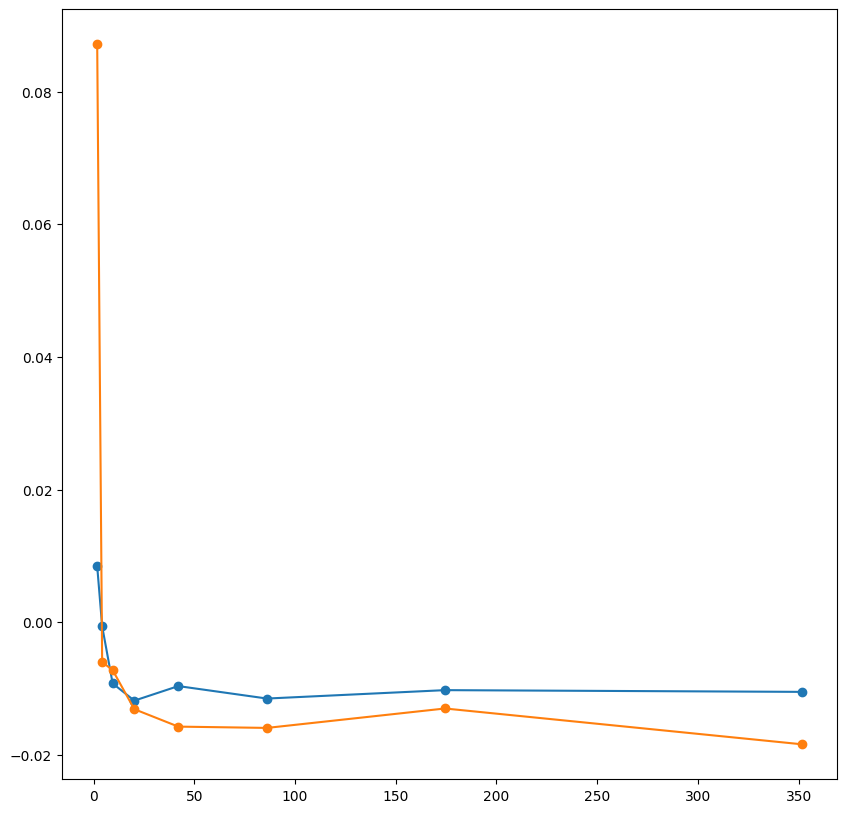

In [67]:
#plot the relativw difference between the NoWag-P and Wanda results

for dataset in ["c4"]:
    plt.figure(figsize=(10, 10))
    for model in models[1:]:
        df = dfs[model]
        
        x = [np.sum(np.log(np.arange(m)+1)) - 2*np.sum(np.log(np.arange(n)+1)) for n, m in zip(df["n"], df["m"])]
        #plot the relative difference between the two methods
        plt.plot(x,
                    df[f"{dataset}_{our_method_name}"]/df[f"{dataset}_wanda"] - 1, label=model,
                    marker="o") 
                 
                #  , df[f"{dataset}_wanda"]/df[f"{dataset}_{our_method_name}"] - 1, label=model,
                #     marker="o")
    
    # plt.xscale("log")
    # plt.ylim([-0.01,0.02])
    # plt.xlim([0, 256])
    raise Exception("stop here")
    

/tmp/ipykernel_612369/3536475179.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([ f"{x}%" for x in vals])


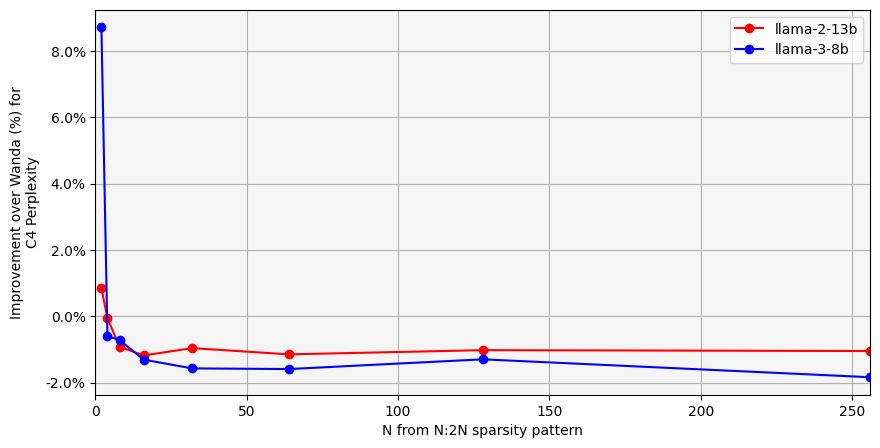

In [100]:
#plot the relativw difference between the NoWag-P and Wanda results
plt.figure(figsize=(10, 5))

colors = ["blue", "red"][::-1]

for dataset in ["c4"]:
    for model, color in zip(models[1:], colors):
        df = dfs[model]
        
        x = [n for n, m in zip(df["n"], df["m"])]
        #plot the relative difference between the two methods
        plt.plot(df["n"],
                    (df[f"{dataset}_{our_method_name}"]/df[f"{dataset}_wanda"] - 1)*100, label=model.replace("Meta-", "").lower(),
                    marker="o",
                    color=color)
                 
                #  , df[f"{dataset}_wanda"]/df[f"{dataset}_{our_method_name}"] - 1, label=model,
                #     marker="o")
    
    plt.legend()
    # plt.xscale("log")
    # plt.ylim([-0.01,0.02])
    plt.xlim([0, 256])
    #add a grid
    plt.grid()
    plt.ylabel(f"Improvement over Wanda (%) for\n{dataset.upper()} Perplexity")
    #add (%) to the y axis
    vals = plt.gca().get_yticks()
    plt.gca().set_yticklabels([ f"{x}%" for x in vals])
    
    plt.xlabel("N from N:2N sparsity pattern")
    
    #color the graph light gray
    plt.gca().set_facecolor('whitesmoke')
    # raise Exception("stop here")

plt.savefig("structure_plot.png", dpi=300, bbox_inches='tight')

In [66]:
np.sum(np.log(np.arange(df["m"])+1)) - 2*np.sum(np.log(np.arange(df["n"])+1)), 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
wanda_n

[2, 4, 8, 16, 32, 64, 128, 256, 512]

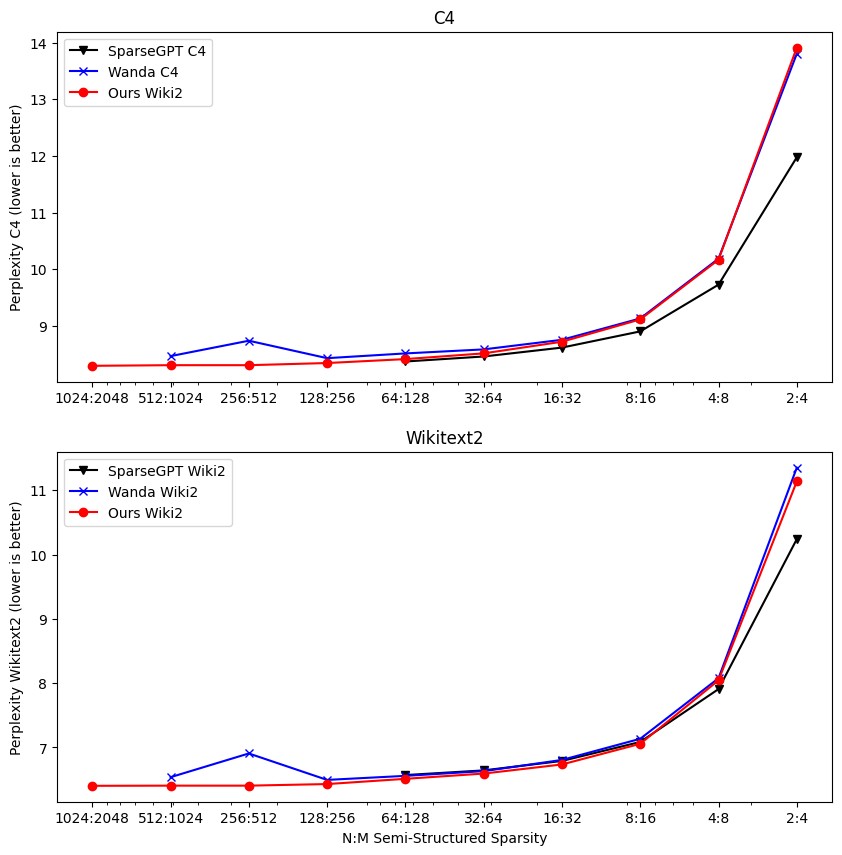

In [7]:
fig,axs = plt.subplots(2,1,figsize=(10,10))
plt.sca(axs[0])

plt.plot(sparsegpt_n[:-1], sparsegpt_results_c4[:-1], label="SparseGPT C4", marker='v',
         color = "black")
plt.plot(wanda_n, wanda_results_c4, label="Wanda C4", marker='x',
          color = "blue")
plt.plot(ours_n, ours_results_c4, label="Ours Wiki2", marker='o',
         color = "red")
axs[0].invert_xaxis()
# plt.ylim([7,15])
plt.xscale('log')
#set the correct x ticks
plt.xticks(ours_n, [f"{ours_n[i]}:{ours_m[i]}" for i in range(len(ours_n))])
# plt.yscale('log')
# plt.xlabel("N:M Semi-Structured Sparsity")
plt.ylabel("Perplexity C4 (lower is better)")
plt.title("C4")
plt.legend()


plt.sca(axs[1])

plt.plot(sparsegpt_n[:-1], sparsegpt_results_wiki2[:-1], label="SparseGPT Wiki2", marker='v',
            color = "black")
plt.plot(wanda_n, wanda_results_wiki2, label="Wanda Wiki2", marker='x',
            color = "blue")
plt.plot(ours_n, ours_results_wiki2, label="Ours Wiki2", marker='o',
            color = "red")
axs[1].invert_xaxis()
# plt.ylim([7,15])
plt.xscale('log')
#set the correct x ticks
plt.xticks(ours_n, [f"{ours_n[i]}:{ours_m[i]}" for i in range(len(ours_n))])
plt.xlabel("N:M Semi-Structured Sparsity")
plt.ylabel("Perplexity Wikitext2 (lower is better)")
plt.title("Wikitext2")
plt.legend()
plt.savefig("llama2_7b.png", dpi=300, bbox_inches='tight')


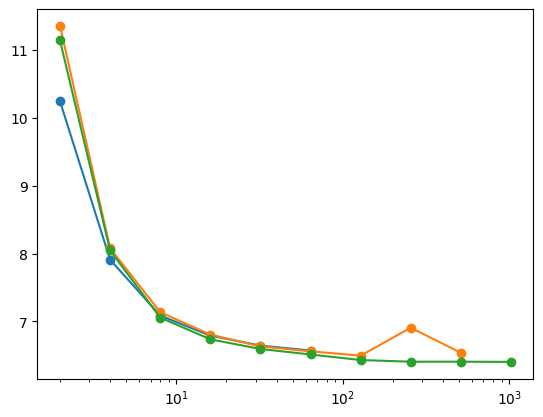

In [8]:
plt.plot(sparsegpt_n[:-1], sparsegpt_results_wiki2[:-1], label="SparseGPT C4", marker='o')
plt.plot(wanda_n, wanda_results_wiki2, label="Wanda C4", marker='o')
plt.plot(ours_n, ours_results_wiki2, label="Ours Wiki2", marker='o')
# plt.ylim([5,15])
plt.xscale('log')
# plt.yscale('log')

In [9]:
#helper function for table generation
models = ["Llama-2-7b-hf",
          "Llama-2-13b-hf",
          "Llama-2-70b-hf",
          "Meta-Llama-3-8B",
        "Meta-Llama-3-70B"]

pattern = "2_4"

#example path /data/lliu/huffman/models/meta-llama/Llama-2-13b-hf/sparse/50unstructured/log.log

for m in models:
    log_path = f"../models/meta-llama/{m}/sparse/*{pattern}*/log.log"
    # print(log_path)
    paths = glob.glob(log_path)
    # print(paths)
    path = paths[0]

    #open the log file
    with open(path, "r") as f:
        lines = f.readlines()
        
        acc_sum = 0
        acc_count = 0
        for line in lines:
            if "|acc     |" in line:
                # print(line)
                # raise Exception("acc found")
                acc = float(line.split("|")[-4].strip())
                acc_sum += acc
                acc_count += 1
        print(round(acc_sum/acc_count*100, 2), end="")
    print(" & ", end="")

54.3 & 58.14 & 66.95 & 51.21 & 67.71 & 